In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
class Chromosome:
    def __init__(self, genes):
        self.genes = genes
        self.fitness = 0
        self.calculate_fitness()
    
    # Calculating fitness of population using squares benchmark function
    def calculate_fitness(self):
        self.fitness = 0
        for i,gene in enumerate(self.genes):
            self.fitness += (i+1)*(gene**2)

In [3]:
class GeneticAlgorithm:
    def __init__(self):
        self.n_chromosomes = 0
        self.n_genes = 0
        self.population = []
        self.max_fitness = 0
        self.fitness_graph = []
        self.generate_population()
        self.calculate_max_fitness()
        
    # Generating standard normal population and evaluating fitness of the population
    def generate_population(self):
        self.n_chromosomes = int(input("Enter number of chromosomes: "))
        self.n_genes = int(input("Enter number of genes: "))
        print(f"Chromosomes: {self.n_chromosomes}\nGenes: {self.n_genes}")
        self.population = []
        for i in range(self.n_chromosomes): 
            genes = np.random.standard_normal(size=self.n_genes).tolist()
            self.population.append(Chromosome(genes))
    
    # Evaluating stopping criteria(max_fitness)
    def calculate_max_fitness(self):
        self.max_fitness = 0
        for i in range(self.n_genes):
            self.max_fitness += (i+1)*100
        
    # Implementing tournament selection
    def selection(self):
        population_size = (self.n_chromosomes*2)//2
        selected_population = []
        while len(selected_population) != self.n_chromosomes:
            # Creating tournament
            tournament_size = population_size//2 if population_size//10 < 5 else size//10
            tournament_population = random.sample(self.population, tournament_size)
            # Appending winner in selected population to generate offsprings
            winner = max(tournament_population, key = lambda chromosome : chromosome.fitness)
            selected_population.append(winner)
        return selected_population

    # Implementing one point crossover
    def cross_over(self, selected_population):
        offsprings = []
        while len(offsprings) != self.n_chromosomes:
            # Randomly generating crossover point
            crossover_point = random.randint(0,self.n_genes-2)
            # Randomly selecting two parents
            parent_a, parent_b = random.sample(selected_population, 2)
            # Generating offsprings by swapping genes
            parent_a.genes[crossover_point:self.n_genes], parent_b.genes[crossover_point:self.n_genes] = parent_b.genes[crossover_point:self.n_genes], parent_a.genes[crossover_point:self.n_genes]
            offsprings += [parent_a, parent_b]
        return offsprings
            
    # Implementing bit flip mutation
    def mutation(self, offsprings):
        # Generating a generating indexes for mutating offsprings
        mutation_range = random.randint(1,len(offsprings)//3)
        random_offsprings = random.sample(range(0, len(offsprings)-1), mutation_range)
        for i in random_offsprings:
            # Randomly replacing a gene in the selected chromosome
            index = random.randint(0,self.n_genes-1)
            offsprings[i].genes[index] = random.uniform(0, 10)
        return offsprings
        
    # Implementing full replacement strategy
    def replacement(self, offsprings):
        # Replacing population with offsprings
        self.population = offsprings
        # Initializing fitness of new population
        for i in range(self.n_chromosomes):
            self.population[i].calculate_fitness()
    
    # Checking termination criteria
    def check_termination(self, i):
        best_chromosome = max(self.population, key = lambda chromosome : chromosome.fitness)
        print(f"Best chromosome after iteration {i}: {best_chromosome.genes} \nFitness: {best_chromosome.fitness}")
        self.fitness_graph.append(best_chromosome.fitness)
        # Comparing fitness of best chromosome with max fitness
        if best_chromosome.fitness >= self.max_fitness:
            print("Termination criteria reached")
            return True
        return False
    
    # Plotting graph to show fitness trend
    def plot_graph(self):
        plt.plot(self.fitness_graph)
        plt.ylim(0, self.max_fitness)
        plt.xlabel("Number of Iterations")
        plt.ylabel("Best Chromosome fitness")

In [4]:
def main(max_iter=100):
    # Population generation
    genetic_algorithm = GeneticAlgorithm()
    for i in range(max_iter):
        # Selection
        selected_population = genetic_algorithm.selection()
        # Cross over
        offsprings = genetic_algorithm.cross_over(selected_population)
        # Mutation
        offsprings = genetic_algorithm.mutation(offsprings)
        # Replacement
        genetic_algorithm.replacement(offsprings)
        # Termination Check
        if genetic_algorithm.check_termination(i+1):
            break
    genetic_algorithm.plot_graph()

Enter number of chromosomes: 10
Enter number of genes: 10
Chromosomes: 10
Genes: 10
Best chromosome after iteration 1: [1.3950047442418891, -0.6134085228669676, 5.080521473286716, 8.381532322388033, 0.9516783134184735, -2.2042888980785245, 0.44069913704655306, -0.43943201163880763, 1.9566499999602527, 6.300775338772596] 
Fitness: 829.1741309596691
Best chromosome after iteration 2: [1.3950047442418891, -0.6134085228669676, 5.080521473286716, 4.515747847121298, 8.762301214050483, -2.2042888980785245, 0.44069913704655306, -0.43943201163880763, 1.9566499999602527, 6.300775338772596] 
Fitness: 1009.1028639174481
Best chromosome after iteration 3: [1.3950047442418891, -0.6134085228669676, 5.080521473286716, 4.515747847121298, 8.762301214050483, -2.2042888980785245, 0.44069913704655306, 9.007138119364612, 5.467743862606023, 6.300775338772596] 
Fitness: 1891.1960503076054
Best chromosome after iteration 4: [9.588656855598401, 9.940164169772572, 5.080521473286716, 4.515747847121298, 8.76230121

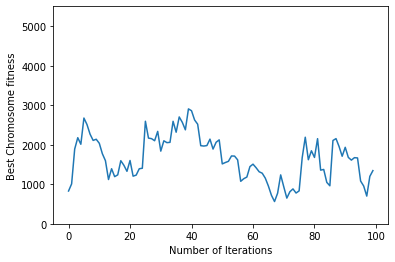

In [5]:
main()